In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [2]:
values = [51.128,66.792,72.886,76.194,78.602,80.230,81.730,83.008,83.872,84.924,85.526,86.092,87.122,87.834,88.112,88.532,89.162,89.700,89.910,90.108,90.660,90.848,91.138,91.666]

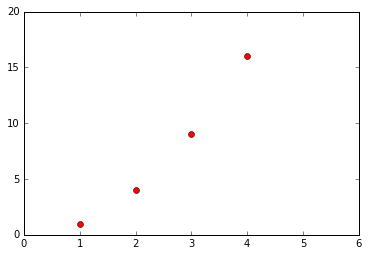

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


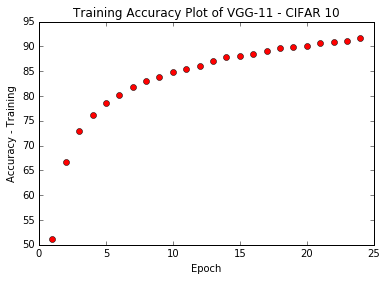

In [10]:
plt.plot(range(1,25), values, 'ro')
# plt.axis([0, 25, 0, 100])
plt.title('Training Accuracy Plot of VGG-11 - CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy - Training')
plt.savefig("vgg_11")
plt.show()

In [13]:
test = [63.77,68.6,72.67,74.11,73.97,79.66,78.55,81.65,82.68,82.06]

train = [51.402, 67.546 , 72.942, 75.97, 78.346, 80.138, 81.72, 82.96 ,83.72 ,84.654 ]

In [21]:
train = pd.read_csv("vgg_tanh_noBin.csv")["train"]
test = pd.read_csv("vgg_tanh_noBin.csv")["test"]

train_det = pd.read_csv("vgg_det_tanh.csv")["train"]
test_det = pd.read_csv("vgg_det_tanh.csv")["test"]

train_stc = pd.read_csv("vgg_stoc_tanh.csv")["train"]
test_stc = pd.read_csv("vgg_stoc_tanh.csv")["test"]


train_bin_net_Det = pd.read_csv("vgg_bin_net_det_tanh.csv")["train"][:49]
test_bin_net_Det = pd.read_csv("vgg_bin_net_det_tanh.csv")["test"][:49]





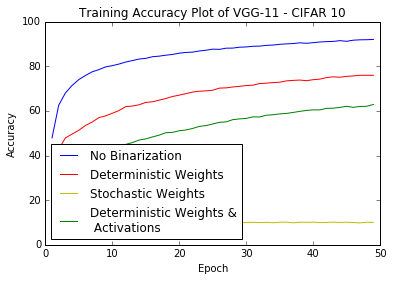

In [28]:
# plt.plot(range(1,25), values, 'ro')
# plt.axis([0, 25, 0, 100])
plt.plot(range(1,50), train, 'b', label='No Binarization')
plt.plot(range(1,50), train_det, 'r', label='Deterministic Weights')
plt.plot(range(1,50), train_stc, 'y', label='Stochastic Weights')
plt.plot(range(1,50), train_bin_net_Det, 'g', label='Deterministic Weights &\n Activations')

plt.title('Training Accuracy Plot of VGG-11 - CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("vgg_11_binary")
plt.show()

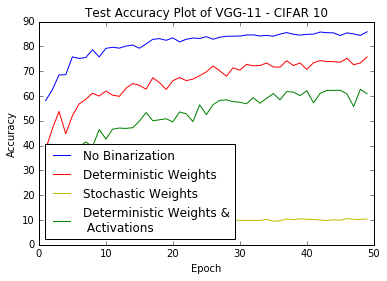

In [27]:
plt.plot(range(1,50), test, 'b', label='No Binarization')
plt.plot(range(1,50), test_det, 'r', label='Deterministic Weights')
plt.plot(range(1,50), test_stc, 'y', label='Stochastic Weights')
plt.plot(range(1,50), test_bin_net_Det, 'g', label='Deterministic Weights &\n Activations')

plt.title('Test Accuracy Plot of VGG-11 - CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("vgg_11_binary_test")
plt.show()

In [52]:
f = open("src/mnist_det_layer_det_act_50.txt","r")
lines = f.readlines()
epoch = []
train = []
test = []
cnt=0
for l in lines:
    x = l.split(" ")
    if(len(x)<4):
        continue
    if(x[0]=="Test"):
        test.append(float(x[7][1:-3]))
    if(x[0]=='\\Training'):
        train.append(float(x[7][1:-3]))
        epoch.append(cnt+1)
        cnt+=1
#     print x[7]
print test, train, epoch

[63.0, 76.0, 81.0, 83.0, 85.0, 86.0, 87.0, 87.0, 88.0, 88.0, 88.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 92.0, 91.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0] [63.0, 76.0, 80.0, 83.0, 84.0, 85.0, 86.0, 86.0, 87.0, 87.0, 88.0, 88.0, 88.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [53]:
df = pd.DataFrame({"test" : test,"epoch":epoch,"train":train})
df.to_csv("mnist_3l_detwtact.csv", index=False)

In [29]:
f = open("src/vgg_bin_act_wt100.txt","r")
lines = f.readlines()
epoch = []
train = []
test = []
cnt=0
for l in lines:
    x = l.split(" ")
    if(len(x)<4):
        continue

    epoch.append(cnt+1)
    cnt+=1
#     print x[7]
    train.append(float(x[6]))
    test.append(float(x[7]))
print test,train

IndexError: list index out of range

In [17]:
df = pd.DataFrame({"test" : test,"epoch":epoch,"train":train})
df.to_csv("vgg_bin_net_det_tanh.csv", index=False)

In [27]:

df = pd.DataFrame({"test" : test,"epoch":epoch})
df.to_csv("mnist_bin_net_tanh.csv", index=False)


In [41]:
train = pd.read_csv("mnist_linear.csv")["train"]
test = pd.read_csv("mnist_linear.csv")["test"]

train_det = pd.read_csv("mnist_linear_det.csv")["train"]
test_det = pd.read_csv("mnist_linear_det.csv")["test"]

train_stc = pd.read_csv("mnist_linear_stoch.csv")["train"]
test_stc = pd.read_csv("mnist_linear_stoch.csv")["test"]




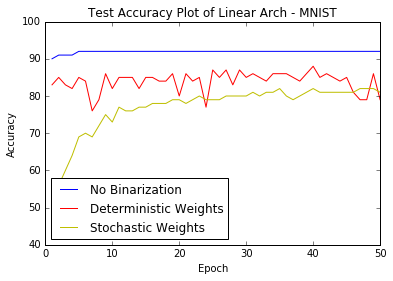

In [44]:
plt.plot(range(1,51), test, 'b', label='No Binarization')
plt.plot(range(1,51), test_det, 'r', label='Deterministic Weights')
plt.plot(range(1,51), test_stc, 'y', label='Stochastic Weights')

plt.title('Test Accuracy Plot of Linear Arch - MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("mnist_linear_test")
plt.show()

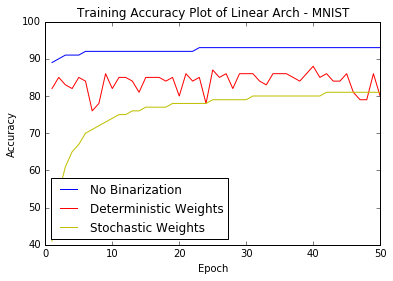

In [45]:
plt.plot(range(1,51), train, 'b', label='No Binarization')
plt.plot(range(1,51), train_det, 'r', label='Deterministic Weights')
plt.plot(range(1,51), train_stc, 'y', label='Stochastic Weights')

plt.title('Training Accuracy Plot of Linear Arch - MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("mnist_linear")
plt.show()

In [54]:
train = pd.read_csv("mnist_3l.csv")["train"]
test = pd.read_csv("mnist_3l.csv")["test"]

train_det = pd.read_csv("mnist_3l_det.csv")["train"]
test_det = pd.read_csv("mnist_3l_det.csv")["test"]

train_stc = pd.read_csv("mnist_3l_stoch.csv")["train"]
test_stc = pd.read_csv("mnist_3l_stoch.csv")["test"]


train_bin_net_Det = pd.read_csv("mnist_3l_detwtact.csv")["train"]
test_bin_net_Det = pd.read_csv("mnist_3l_detwtact.csv")["test"]





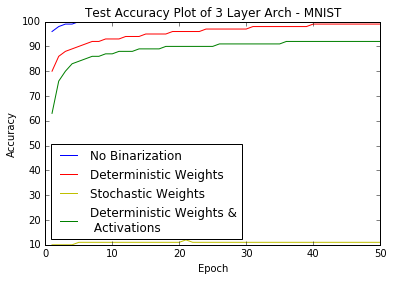

In [58]:
plt.plot(range(1,51), train, 'b', label='No Binarization')
plt.plot(range(1,51), train_det, 'r', label='Deterministic Weights')
plt.plot(range(1,51), train_stc, 'y', label='Stochastic Weights')
plt.plot(range(1,51), train_bin_net_Det, 'g', label='Deterministic Weights &\n Activations')

plt.title('Training Accuracy Plot of 3 Layer Arch - MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("mnist_3l")
plt.show()

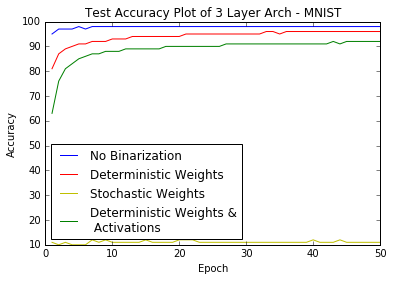

In [57]:
plt.plot(range(1,51), test, 'b', label='No Binarization')
plt.plot(range(1,51), test_det, 'r', label='Deterministic Weights')
plt.plot(range(1,51), test_stc, 'y', label='Stochastic Weights')
plt.plot(range(1,51), test_bin_net_Det, 'g', label='Deterministic Weights &\n Activations')

plt.title('Test Accuracy Plot of 3 Layer Arch - MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')
plt.savefig("mnist_3l_test")
plt.show()